In [1]:
import pandas as pd
import numpy as np

In [4]:
remote_csv = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"

In [7]:
!wget $remote_csv

--2023-09-17 22:13:16--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M   380KB/s    in 3.8s    

2023-09-17 22:13:20 (380 KB/s) - ‘data.csv’ saved [1475504/1475504]



In [8]:
df = pd.read_csv("data.csv")

# 1. Data preparation

In [9]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [11]:
# note: the column names are inconsistent
# you can do eg. df["Transmission Type"] but not df.Transmission Type
# so we need to do some cleaning
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [13]:
# cleaned up columns:

df.columns.str.lower().str.replace(' ', '_')

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [16]:
# that looks better, let's set the columns and look at the data again

df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [21]:
# the column types need cleaning
# note the "object" columns

print("dtypes")
print(df.dtypes)

obj_cols = df.dtypes[df.dtypes == "object"]
print("object columns: ", obj_cols)

col_strs = list(df.dtypes[df.dtypes == "object"].index)
col_strs

dtypes
make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object
object columns:  make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object


['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [22]:
# cleanup the column values -> lower() and use '_'

for col in col_strs:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# Exploratory data analysis

In [23]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler' 'nissan' 'volvo' 'mazda'
 'mitsubishi' 'ferrari' 'alfa_romeo' 'toyota' 'mclaren' 'maybach'
 'pontiac' 'porsche' 'saab' 'gmc' 'hyundai' 'plymouth' 'honda'
 'oldsmobile' 'suzuki' 'ford' 'cadillac' 'kia' 'bentley' 'chevrolet'
 'dodge' 'lamborghini' 'lincoln' 'subaru' 'volkswagen' 'spyker' 'buick'
 'acura' 'rolls-royce' 'maserati' 'lexus' 'aston_martin' 'land_rover'
 'lotus' 'infiniti' 'scion' 'genesis' 'hummer' 'tesla' 'bugatti']

model
['1_series_m' '1_series' '100' '124_spider' '190-class' '2_series' '200'
 '200sx' '240sx' '240' '2' '3_series_gran_turismo' '3_series' '300-class'
 '3000gt' '300' '300m' '300zx' '323' '350-class' '350z' '360' '370z' '3'
 '4_series_gran_coupe' '4_series' '400-class' '420-class' '456m'
 '458_italia' '4c' '4runner' '5_series_gran_turismo' '5_series'
 '500-class' '500e' '500' '500l' '500x' '550' '560-class' '570s' '575m'
 '57' '599' '5' '6_series_gran_coupe' '6_series' '600-class' '6000'
 '612_scaglietti' '6

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

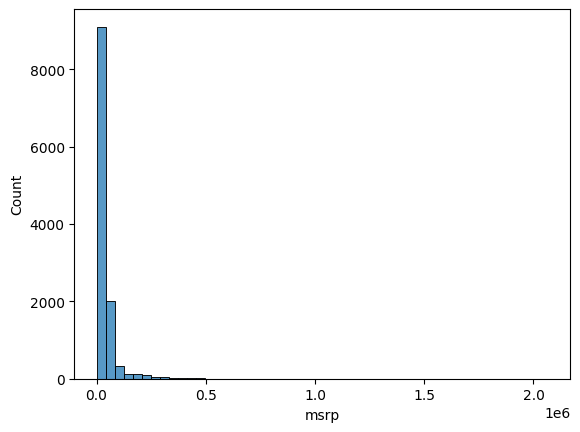

In [25]:
sns.histplot(df.msrp, bins=50)

# the msrp is in 1e6
# most of the data is concentrated around 0.0 - this is the long tail distribution

<Axes: xlabel='msrp', ylabel='Count'>

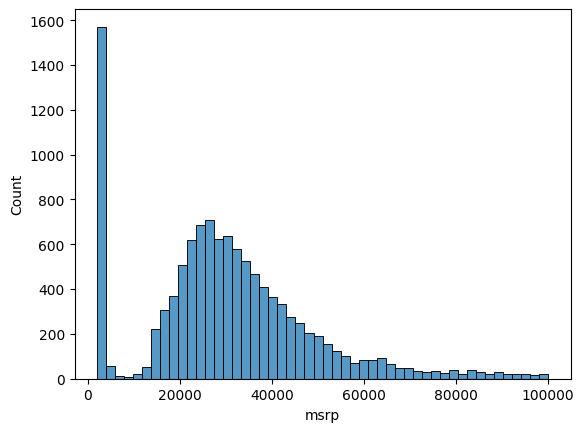

In [26]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

# msrp mean around $25,000

In [36]:
# want to get rid of the outliers
# log distribution

lg = np.log([1, 10, 1000, 100000])
print(lg)

# we can add 1 to each so we can include a 0 lower bound but not deal with inf
p1 = np.log([0+1, 1+1, 10+1, 1000+1, 100000+1])
print(p1)

# also can just use np.log1p(...)
l1p = np.log1p([0, 1, 10, 1000, 100000])
print(l1p)

[ 0.          2.30258509  6.90775528 11.51292546]
[ 0.          0.69314718  2.39789527  6.90875478 11.51293546]
[ 0.          0.69314718  2.39789527  6.90875478 11.51293546]


In [37]:
# now apply logs to the msrps

price_logs = np.log1p(df.msrp)
print(price_logs)

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64


<Axes: xlabel='msrp', ylabel='Count'>

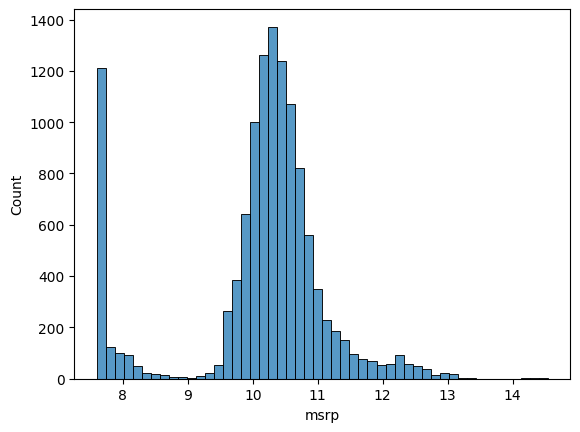

In [38]:
# normal distribution (resembles bell curve)
# normal dist is ideal for models. long tail distributions tend to confuse models
sns.histplot(price_logs, bins=50)

In [42]:
# missing values
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# Validation Framework

In [47]:
# train: 60%
# val: 20%
# test: 20%
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test

In [48]:
n, n_val + n_test + n_train

(11914, 11914)

In [49]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [57]:
df.iloc[[0, 1, 2]]

# can also use range
df.iloc[:10]

In [68]:
# make sure we shuffle our data
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

In [69]:
idx[n_train:]

array([2779, 3708, 4794, ..., 6637, 2575, 7336])

In [73]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [74]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [75]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [82]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

AttributeError: 'DataFrame' object has no attribute 'msrp'

In [83]:
len(y_train)

7150

# Linear regression

In [84]:
# g(X) ~= y
# where g is model
# X is feature matrix
# y is target
# (in this case, target is price)
# g(x_i) = y_i
# where x_i is a car
# x_i = (x_i1, x_i2, ..., x_in)
# g(x_i1, x_i2, ..., x_in) ~= y_i

In [85]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [94]:
# let's take engine_hp, city_mpg, popularity
xi = [453, 11, 86]
w0 = 0
w = [1, 1, 1] # vector for each feature
# g(xi) = W_0 + W_1*x_i1 + W_2*x_i2 + ...
# g(xi) = W_0 + sum{j=0,n-1}(W_j * x_j)

In [97]:
def linear_regression(xi):
    n = len(xi)
    pred = w0
    for j in range(n):
        pred = pred + w[j] * xi[j]
    return pred

In [98]:
linear_regression(xi)

550

In [100]:
# now let's try different weights
# what does it actually mean?
# w0 is the bias term, and what we predict if we don't know anything about the car
# in this model, the w_j has some correlation with price. e.g. more HP | more mpg | more popular -> more expensive

w0 = 7.17
w = [0.01, 0.04, 0.002]
linear_regression(xi)

12.312

In [111]:
# predicted price
# np.exp()-1 == np.expm1(n)
print(np.exp(12.312))
print(np.expm1(12.312))

222348.2221101062
222347.2221101062


In [112]:
np.log1p(222347.2221101062)

12.312

# Linear regression, vector form

In [114]:
def dot(xi, w):
    n = len(xi)
    res = 0.0
    for j in range(n):
        res = res + xi[j] * w[j]
    return res

In [116]:
w_new = [w0] + w

In [117]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [118]:
linear_regression(xi)

12.312

In [120]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]
x_new = [w0] + w

In [121]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = np.array([x1, x2, x10])

In [125]:
def linear_regression(X_in):
    return X_in.dot(w_new)

In [126]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

# Training a linear regression model

In [128]:
# we want
# g(X) = X*W ~= y
# ideally X*W = y. to solve this, we might try to find X^-1 (inverse) but there is usually no X^-1. so we try to approximate.
# X^T * X * W = X^T * y
# X^T * X is the "Gram matrix". it's always squared, i.e. (n+1) * (n+1)
# the gram matrix has an inverse, so...
# (X^T * X)^-1 * X^T * X * W = (X^T * X) * X^T * y
# I * W = (X^T * X) * X^T * y
# W = (X^T * X) * X^T * y

In [207]:
X_in = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X_in = np.array(X_in)
X_in

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [202]:
# include the bias term, i.e. the baseline
ones = np.ones(X_in.shape[0])
X_in = np.column_stack([ones, X_in])

In [203]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [204]:
XTX = X_in.T.dot(X_in)
XTX_inv = np.linalg.inv(XTX)
w_full = XTX_inv.dot(X_in.T).dot(y)

In [212]:
w_full[0], w_full[1:]

(25844.754055766753, array([ -16.08906468, -199.47254894,   -1.22802883]))

In [208]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [211]:
# Something weird happens if I try to run all the cells in succession, I get an error "singular matrix"
train_linear_regression(X_in, y)

(25844.754055766753, array([ -16.08906468, -199.47254894,   -1.22802883]))

# Car price baseline model

In [216]:
# features
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [217]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [219]:
X_train = df_train[base].fillna(0).values

In [220]:
# y_train = np.log1p(df_train.msrp.values)
w0, w = train_linear_regression(X_train, y_train)


In [221]:
w0, w

(7.927257388069986,
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [222]:
X_train.dot(w)

array([1.62067044, 1.46008238, 1.74472019, ..., 2.37697276, 4.05063401,
       2.07137372])

In [223]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

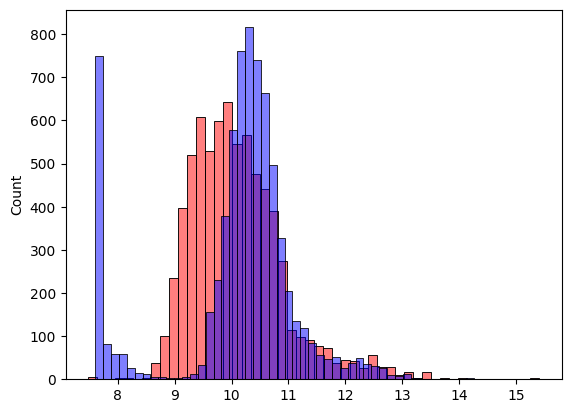

In [226]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

# RMSE

In [229]:
# the previous target isn't so good, so let's look into RMSE
# (g(xi) - yi)^2 -> g(xi) is prediction for xi, yi is actual value
# RMSE = sqrt( (1/m) * SUM{1,m}(g(xi) - yi)^2 )

def rmse(y, y_pred):
    err = y - y_pred
    sq_err = err ** 2
    mse = sq_err.mean()
    return np.sqrt(mse)

In [230]:
rmse(y_train, y_pred)

0.7554192603920132

# Validate the model

In [234]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [235]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [236]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

In [239]:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.761653099130156

# Feature engineering

In [244]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base + ['age']
    df_num = df[features]
    df_num = df_num.fillna(0)
    return df_num.values

In [247]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred) # from 0.762 -> 0.517

0.5172055461058299

<Axes: ylabel='Count'>

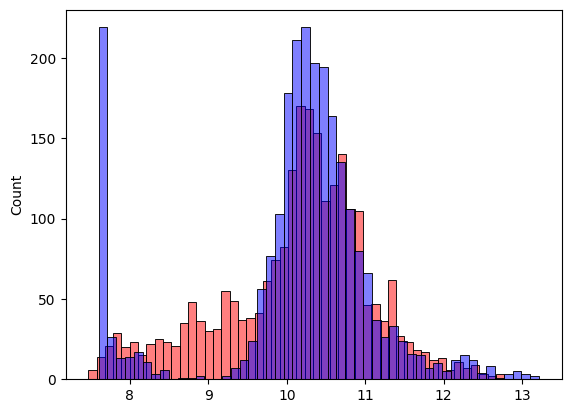

In [249]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

# graphs look a lot closer now

# Categorical variables

In [251]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [252]:
df_train.number_of_doors

0       2.0
1       4.0
2       4.0
3       3.0
4       4.0
       ... 
7145    2.0
7146    2.0
7147    4.0
7148    4.0
7149    4.0
Name: number_of_doors, Length: 7150, dtype: float64

In [253]:
# number_of_doors is a categorical variable
# we can represent with binary (0, 1)
# so create categorical columns
# e.g.
df_train.number_of_doors == 2

0        True
1       False
2       False
3       False
4       False
        ...  
7145     True
7146     True
7147    False
7148    False
7149    False
Name: number_of_doors, Length: 7150, dtype: bool

In [254]:
(df_train.number_of_doors == 2).astype('int')

0       1
1       0
2       0
3       0
4       0
       ..
7145    1
7146    1
7147    0
7148    0
7149    0
Name: number_of_doors, Length: 7150, dtype: int64

In [255]:
(df_train.number_of_doors == 4).astype('int')

0       0
1       1
2       1
3       0
4       1
       ..
7145    0
7146    0
7147    1
7148    1
7149    1
Name: number_of_doors, Length: 7150, dtype: int64

In [256]:
# then write back to df, e.g.

df_train['num_doors_2'] = (df_train.number_of_doors == 2).astype('int')
df_train['num_doors_3'] = (df_train.number_of_doors == 3).astype('int')
df_train['num_doors_4'] = (df_train.number_of_doors == 4).astype('int')

In [257]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1,0,0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0,0,1
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0,0,1
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0,1,0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,1,0,0
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,1,0,0
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,0,0,1
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,0,0,1


In [260]:
# now let's pick columns to use for categories
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)

In [261]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']

    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' % v)

    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [262]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

52.43997510237891

In [263]:
# however, the rmse was huge. the weights are too big

w0, w

(-1140836584489243.2,
 array([ 1.47227861e-01, -7.62674385e+00,  5.22801945e-01,  2.22943217e+00,
        -1.48954711e-03,  8.25854734e-01,  3.34489377e+03,  3.37499633e+03,
         3.34295246e+03, -5.26211899e+00, -7.00041849e-02,  8.11222539e+00,
         2.83170539e+01, -2.43469056e+00, -5.30933332e+00, -4.15696000e+01,
        -9.53733488e+00, -5.43917524e+00, -2.04622239e+02,  1.28819567e+02,
         1.26400304e+02,  1.38282309e+02,  1.18291972e+02,  1.16041717e+02,
         1.14083658e+15,  1.14083658e+15,  1.14083658e+15,  1.14083658e+15,
         9.61059811e-01, -4.24899350e+00,  2.14325843e+00,  2.45246098e+01,
         5.66683406e+00,  1.22759762e+02,  9.56166622e+01,  1.35286208e+02,
        -1.44115660e-01, -2.62579827e-02,  1.75913981e-01,  3.65037816e-01,
        -2.90235596e-01]))

# Regularization

In [264]:
# add some small value (regularization) to the diagonal of the XTX matrix
# to prevent weights from blowing up

def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

# Tune the model

In [266]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 -1140836584489243.2 52.43997510237891
1e-05 7.545094200274929 0.46081529310213426
0.0001 7.130446807785097 0.4608153656399985
0.001 7.130870325439462 0.4608158583496997
0.1 7.000232427854901 0.4608736549066824
1 6.250747847499822 0.46158128382730246
10 4.729512585683397 0.4726098772670107


In [269]:
# as we see above, regularization values 1e-05 to 0.001 yield a decent RMSE score and weight
# let's pick 0.001

r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

0.4608158583496997

# Using the model

In [275]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031,
 'msrp': 35000}

In [276]:
df_small = pd.DataFrame([car])

X_test = prepare_X(df_small)[0]
y_pred = w0 + X_test.dot(w)
suggestion = np.expm1(y_pred)
suggestion

40697.25662903206

In [278]:
car['msrp']

35000